In [1]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

In [2]:
# Load a color image 
image = cv2.imread('cat.jpeg')

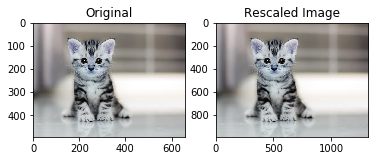

In [3]:
# To scale we use the resize function in opencv
res = cv2.resize(image,None,fx=2, fy=2, interpolation = cv2.INTER_AREA)
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.subplot(122),plt.imshow(res),plt.title('Rescaled Image')
plt.show()

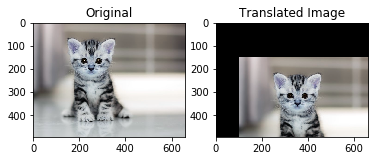

In [4]:
# To apply translation on the given image, we use the warpAffine function in opencv

# first we calculate the number of rows and columns in the given image
rows,columns = image.shape[:2]
x = 100
y = 150

# now we make a numpy array to make the transformation matrix T which shifts the given image by (x,y):
T = np.float32([[1,0,x],[0,1,y]])

trans = cv2.warpAffine(image,T,(columns,rows))

plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.subplot(122),plt.imshow(trans),plt.title('Translated Image')
plt.show()

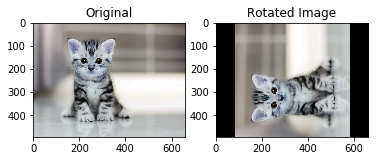

In [5]:
# To rotate the given image, we use the getRotationMatrix2D and warpAffine function in opencv
# We get the transformation matrix R by using the getRotationMatrix2D function
# We can specify the angle alpha by which we want to rotate the image and the scalingfactor
alpha = 90
scalingfactor = 1
R = cv2.getRotationMatrix2D((columns/2,rows/2),alpha,scalingfactor)

rot = cv2.warpAffine(image,R,(columns,rows))

plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.subplot(122),plt.imshow(rot),plt.title('Rotated Image')
plt.show()

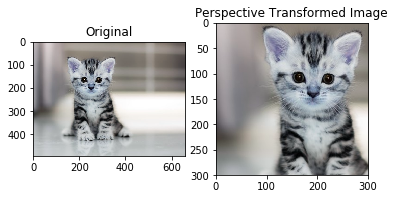

In [6]:
# To perform perspective transformation, we use getPerspectiveTransform and warpPerspective function in opencv
# First we need to calculate the number of rows, columns and channels in the given image
rows,columns,channels = image.shape

# Then we need the location of 4 points in the original image as well as in the final transformed image to get the Transformation matrix
orig = np.float32([[56,65],[368,52],[28,387],[389,390]])
final = np.float32([[0,0],[300,0],[0,300],[300,300]])

P = cv2.getPerspectiveTransform(orig,final)
maxwidth = 300
maxheight = 300
pers = cv2.warpPerspective(image,P,(maxwidth,maxheight))

plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.subplot(122),plt.imshow(pers),plt.title('Perspective Transformed Image')
plt.show()